In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [5]:
df.shape

(1000, 8)

In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
print('The features of gender are: '   ,end="")
print(df['gender'].unique())
print("The features of parental_level_of_education are:   " ,end="")
print(df['parental_level_of_education'].unique())
print("The features of lunch are:  " , end= "")
print(df['lunch'].unique())
print('The features of test_preparation_course are:  ', end= "")
print(df['test_preparation_course'].unique())
print("The features of race_ethnicity are:   ", end="")
print(df['race_ethnicity'].unique())

The features of gender are: ['female' 'male']
The features of parental_level_of_education are:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The features of lunch are:  ['standard' 'free/reduced']
The features of test_preparation_course are:  ['none' 'completed']
The features of race_ethnicity are:   ['group B' 'group C' 'group A' 'group D' 'group E']


In [17]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [18]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

In [19]:
df.head(4)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333


In [31]:
numerical_features = [x for x in df.columns if df[x].dtype!=object]
categorical_features = [x for x in df.columns if df[x].dtype==object]

In [35]:
print(f'The numerical features are: {numerical_features}')
print(f'The categorical features are: {categorical_features}')

The numerical features are: ['math_score', 'reading_score', 'writing_score', 'total_score', 'average']
The categorical features are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Find the maximum socre (count of full score i.e 100)

In [37]:
Math_full_score = df[df['math_score']==100]['average'].count()
Reading_full_score = df[df['reading_score']==100]['average'].count()
Writing_full_score = df[df['writing_score']==100]['average'].count()

print(f'The number of full score in math is : {Math_full_score}')
print(f"The number of full score in reading is: {Reading_full_score}")
print(f"The number of full score in writing is: {Writing_full_score}")

The number of full score in math is : 7
The number of full score in reading is: 17
The number of full score in writing is: 14


In [39]:
Math_score_under20 = df[df['math_score']<=20]['average'].count()
Reading_score_under20 = df[df['reading_score']<=20]['average'].count()
Writing_score_under20 = df[df['writing_score']<=20]['average'].count()
print(f'Math score below 20 are: {Math_score_under20}')
print(f'Reading score below 20 are: {Reading_score_under20}')
print(f'Writing score below 20 are: {Writing_score_under20}')

Math score below 20 are: 4
Reading score below 20 are: 1
Writing score below 20 are: 3


In [49]:
Math_score_under20 = df[df['math_score']<=20]['math_score']


In [50]:
print(Math_score_under20)

17     18
59      0
787    19
980     8
Name: math_score, dtype: int64


In [52]:
Math_full_score_data = df[df['math_score']==100]['average']
print(f"The data from df with 100 math score are: \n {Math_full_score_data}")

The data from df with 100 math score are: 
 149     97.666667
451     96.333333
458    100.000000
623     94.000000
625     98.666667
916    100.000000
962    100.000000
Name: average, dtype: float64


Visualization

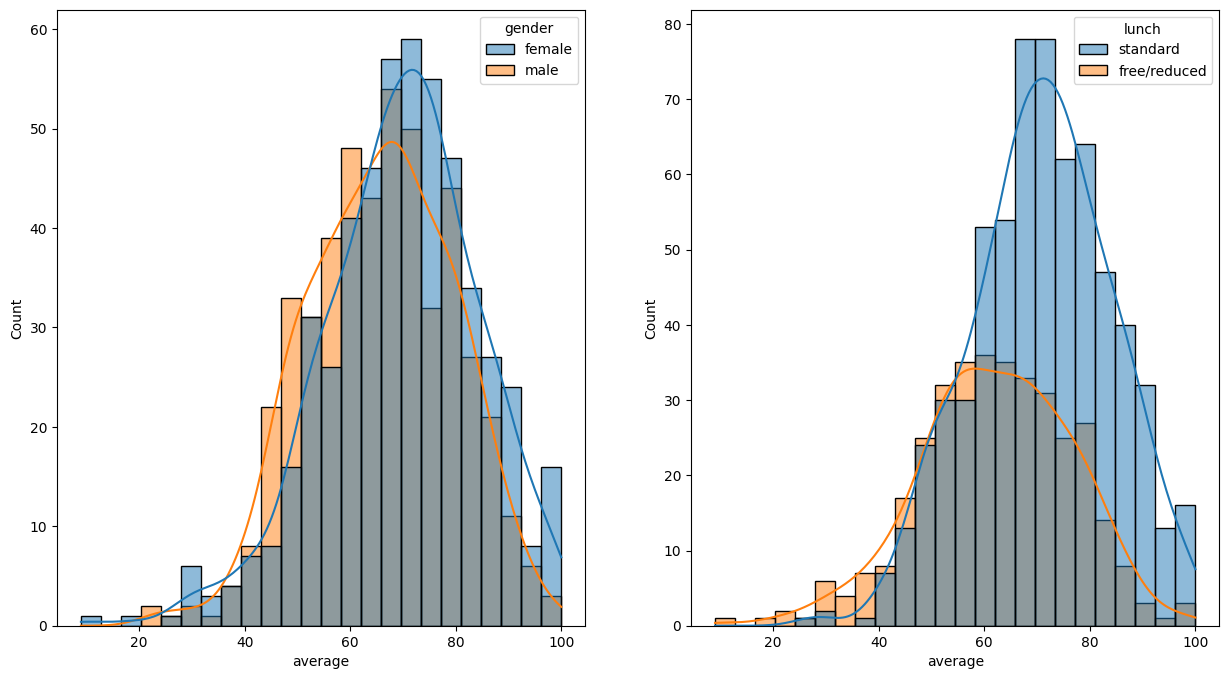

In [54]:
fig, axs = plt.subplots(1,2, figsize=(15,8))
plt.subplot(121)
sns.histplot(data=df, x='average', kde = True, hue='gender')
plt.subplot(122)
sns.histplot(data=df, kde =True, x='average', hue='lunch')
plt.show()

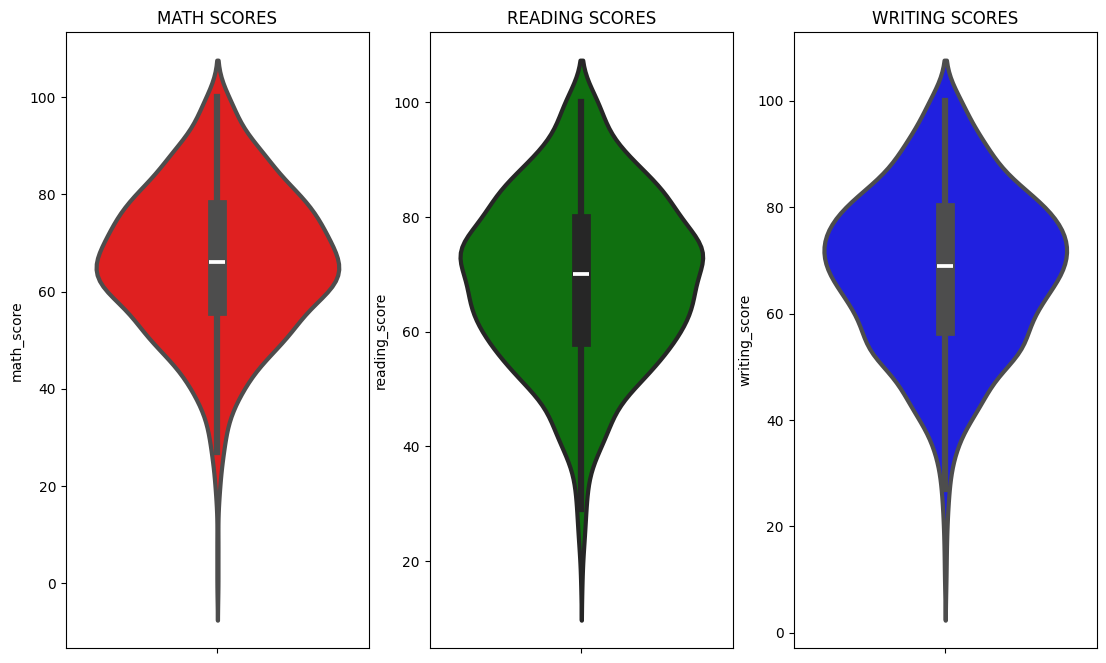

In [55]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

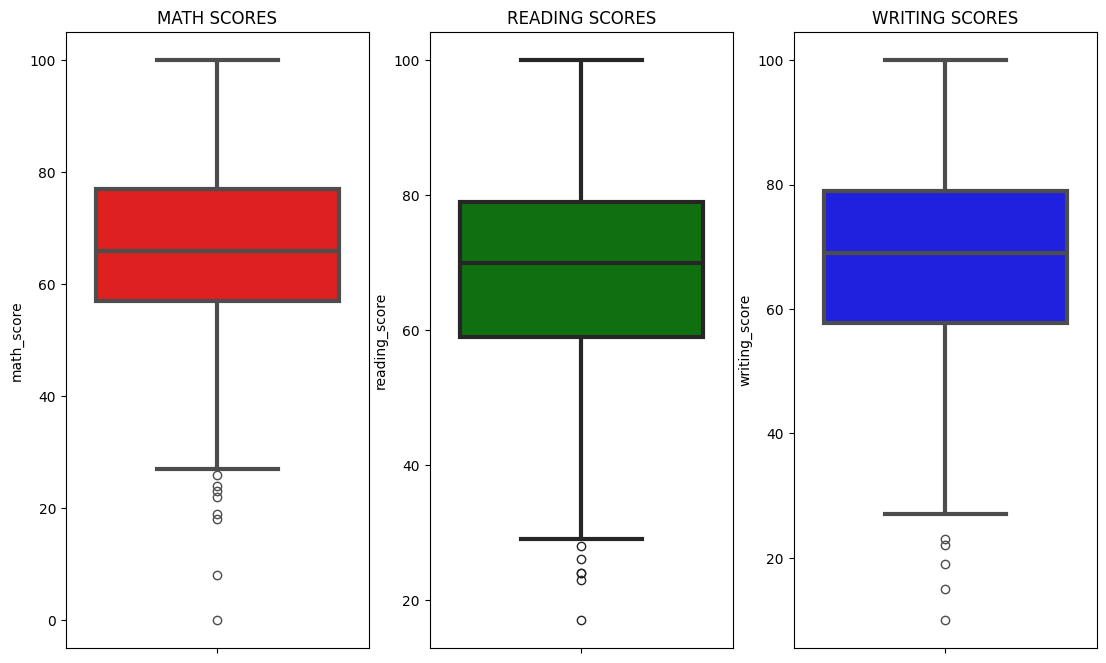

In [56]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.boxplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.boxplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.boxplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

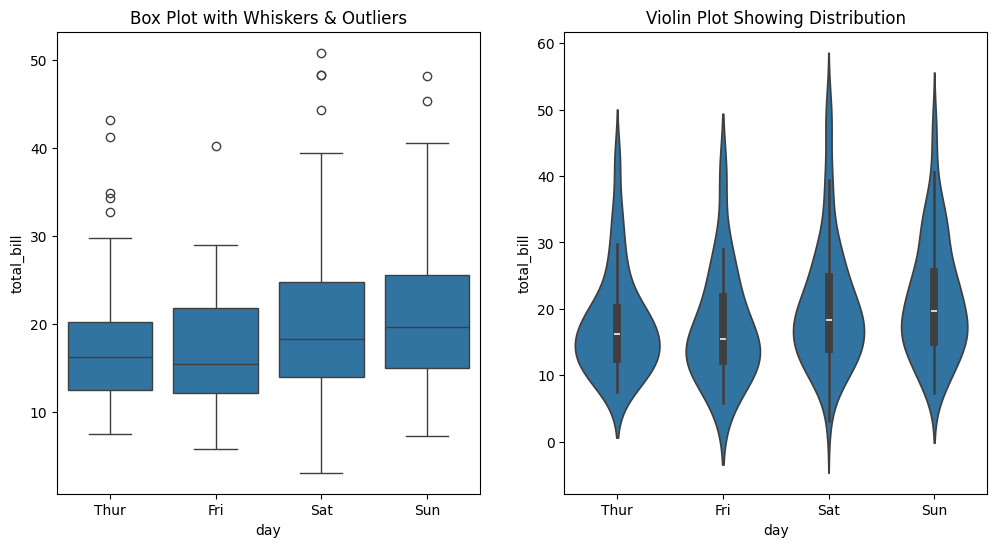

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
tips = sns.load_dataset("tips")

# Create figure
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("Box Plot with Whiskers & Outliers")

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("Violin Plot Showing Distribution")

plt.show()


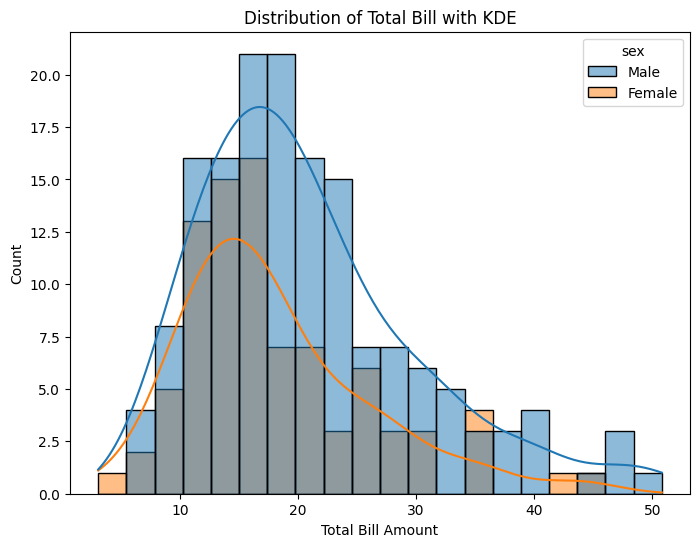

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset
tips = sns.load_dataset("tips")

# Creating the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=tips, x="total_bill", bins=20, kde=True, hue="sex")
plt.title("Distribution of Total Bill with KDE")
plt.xlabel("Total Bill Amount")
plt.ylabel("Count")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_12724\2820221961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=tips, palette="coolwarm")


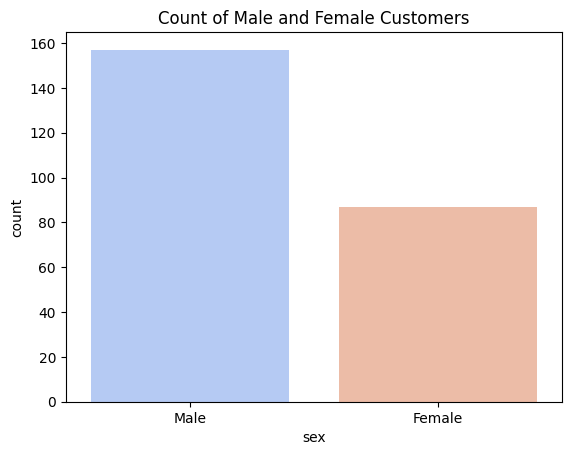

In [59]:
import matplotlib.pyplot as plt

sns.countplot(x="sex", data=tips, palette="coolwarm")
plt.title("Count of Male and Female Customers")
plt.show()


In [62]:
import seaborn as sns
import pandas as pd

# Load dataset
tips = sns.load_dataset("tips")

# Display unique values
print(tips["sex"].value_counts())


sex
Male      157
Female     87
Name: count, dtype: int64


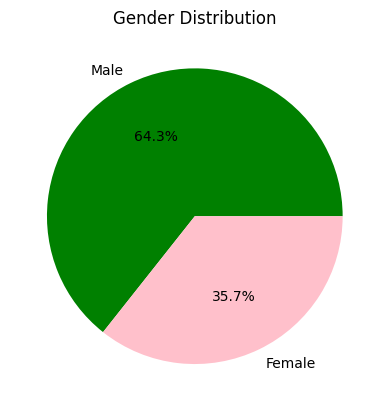

In [66]:
tips["sex"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["green", "pink"])
plt.title("Gender Distribution")
plt.ylabel("")  # Hides the default label
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_12724\381677786.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sex", y="total_bill", data=tips, palette="coolwarm")


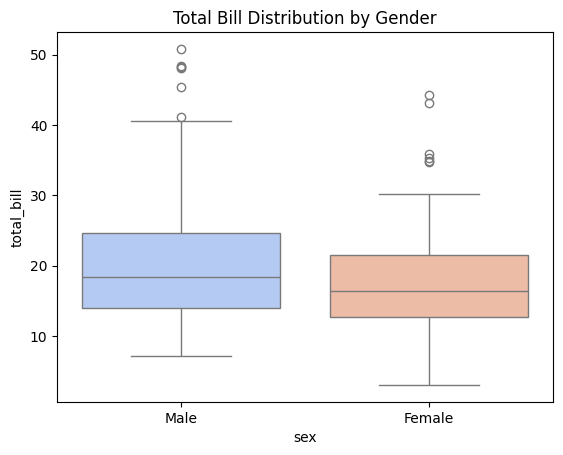

In [67]:
sns.boxplot(x="sex", y="total_bill", data=tips, palette="coolwarm")
plt.title("Total Bill Distribution by Gender")
plt.show()


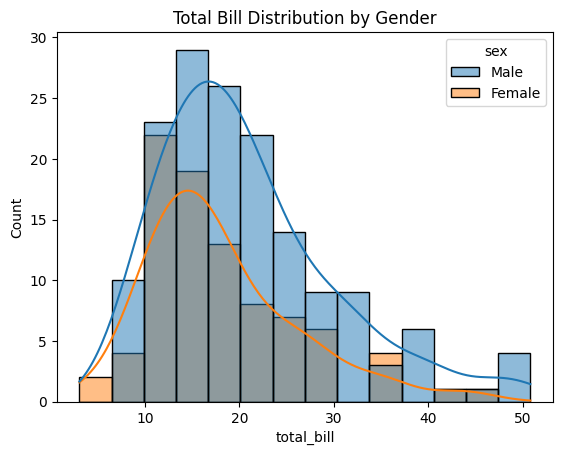

In [68]:
sns.histplot(data=tips, x="total_bill", hue="sex", kde=True)
plt.title("Total Bill Distribution by Gender")
plt.show()


In [70]:
import pandas as pd

# Sample Data
data = pd.DataFrame({
    "Gender": ["Male", "Male", "Female", "Female"],
    "Smoker": ["Yes", "No", "Yes", "No"],
    "Count": [30, 70, 20, 80]
})

# Pivoting the data
pivot_data = data.pivot(index="Smoker", columns="Gender", values="Count")
print(pivot_data)


Gender  Female  Male
Smoker              
No          80    70
Yes         20    30


C:\Users\user\AppData\Local\Temp\ipykernel_12724\3968048318.py:16: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pivot_data.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, figsize=(8, 4), ax=ax)


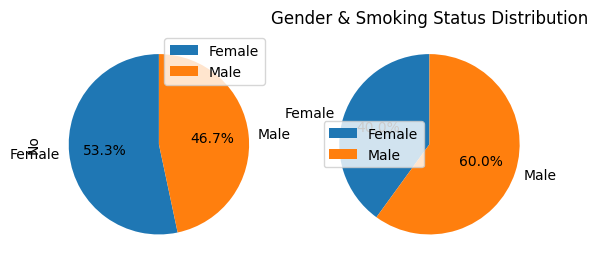

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample Data
data = pd.DataFrame({
    "Gender": ["Male", "Male", "Female", "Female"],
    "Smoker": ["Yes", "No", "Yes", "No"],
    "Count": [30, 70, 20, 80]
})

# Pivoting the data for visualization
pivot_data = data.pivot(index="Gender", columns="Smoker", values="Count")

# Create a nested pie chart
fig, ax = plt.subplots()
pivot_data.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, figsize=(8, 4), ax=ax)
plt.title("Gender & Smoking Status Distribution")
plt.ylabel("")  # Hide y-label
plt.show()


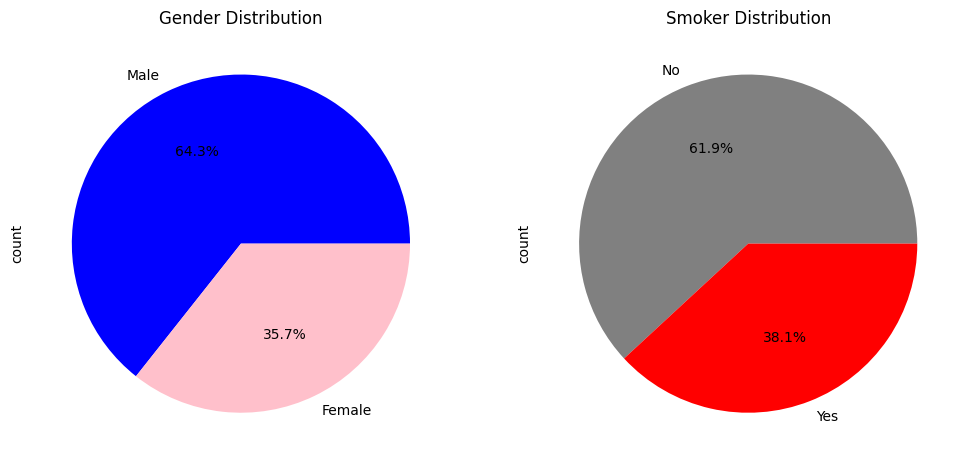

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for gender distribution
tips["sex"].value_counts().plot(kind="pie", autopct="%1.1f%%", ax=axes[0], colors=["blue", "pink"])
axes[0].set_title("Gender Distribution")

# Pie chart for smoker distribution
tips["smoker"].value_counts().plot(kind="pie", autopct="%1.1f%%", ax=axes[1], colors=["gray", "red"])
axes[1].set_title("Smoker Distribution")

plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_12724\2814890869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


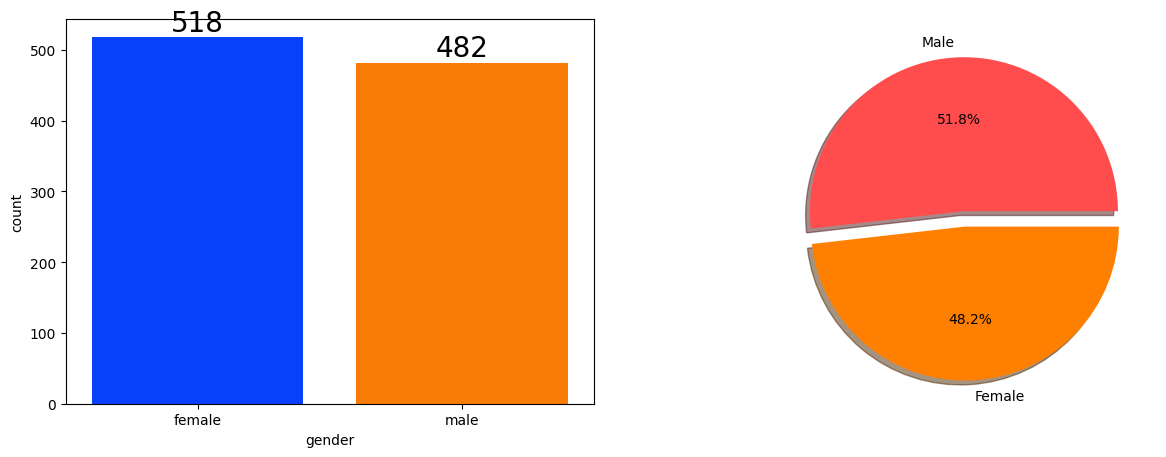

In [73]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12724\8563324.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='bright', ax=ax[0], saturation=0.95)


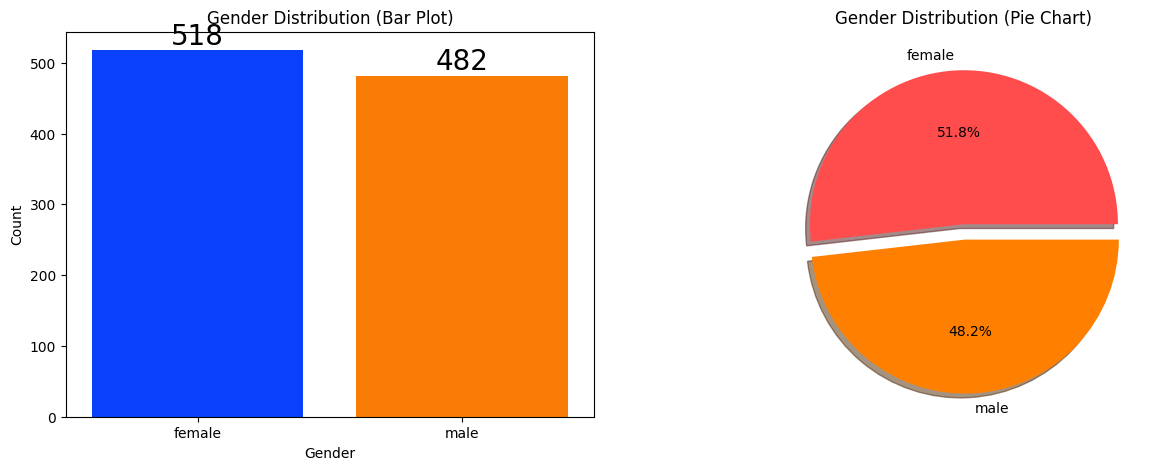

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart using value_counts() for consistency
gender_counts = df['gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='bright', ax=ax[0], saturation=0.95)

# Adding labels to bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

ax[0].set_title("Gender Distribution (Bar Plot)")
ax[0].set_xlabel("Gender")
ax[0].set_ylabel("Count")

# Pie chart using the same data
ax[1].pie(gender_counts, labels=gender_counts.index, explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
ax[1].set_title("Gender Distribution (Pie Chart)")

plt.show()


ValueError: could not convert string to float: 'female'

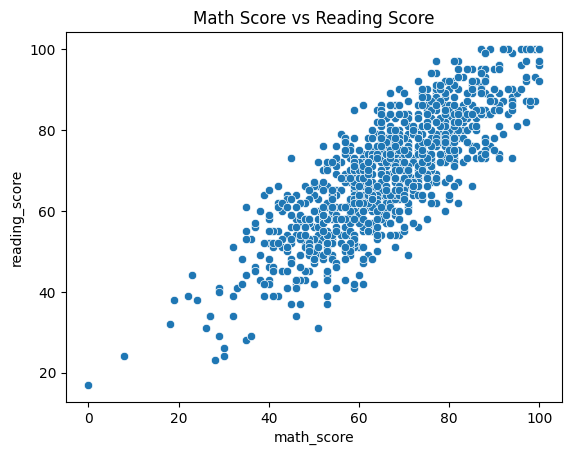

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['number'])
# Scatter plot
sns.scatterplot(x=df["math_score"], y=df["reading_score"])
plt.title("Math Score vs Reading Score")

# Correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
